In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use("fivethirtyeight")
sns.set_style('white')

In [4]:
df = pd.read_csv('/content/datasets_596958_1073629_Placement_Data_Full_Class (1).csv')

In [5]:
data = df.copy()

In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
data['salary'] = data['salary'].fillna(0)

In [12]:
def cat_unmariated_analysis(feature):
  data_ = data[feature].value_counts().sort_values(ascending = True)
  plt.figure(figsize = (20,15),facecolor = 'white')
  plt.subplot(1,2,1)
  plt.barh(y = data_.index,width = data_.values,
           linewidth = 1,height = 0.7,
           edgecolor = 'k')

  sns.despine()
  ax = plt.subplot(1,2,2)
  ax.pie(x = data_.values,labels = data_.index,
         radius = 1.2,shadow = True,
         autopct = '%.1f%%',
         explode = [0.04 for i in range(data[feature].nunique())])
  ax.add_artist(plt.Circle((0,0),0.04 ,facecolor = 'white'))
  plt.suptitle(t = feature)
  plt.show()

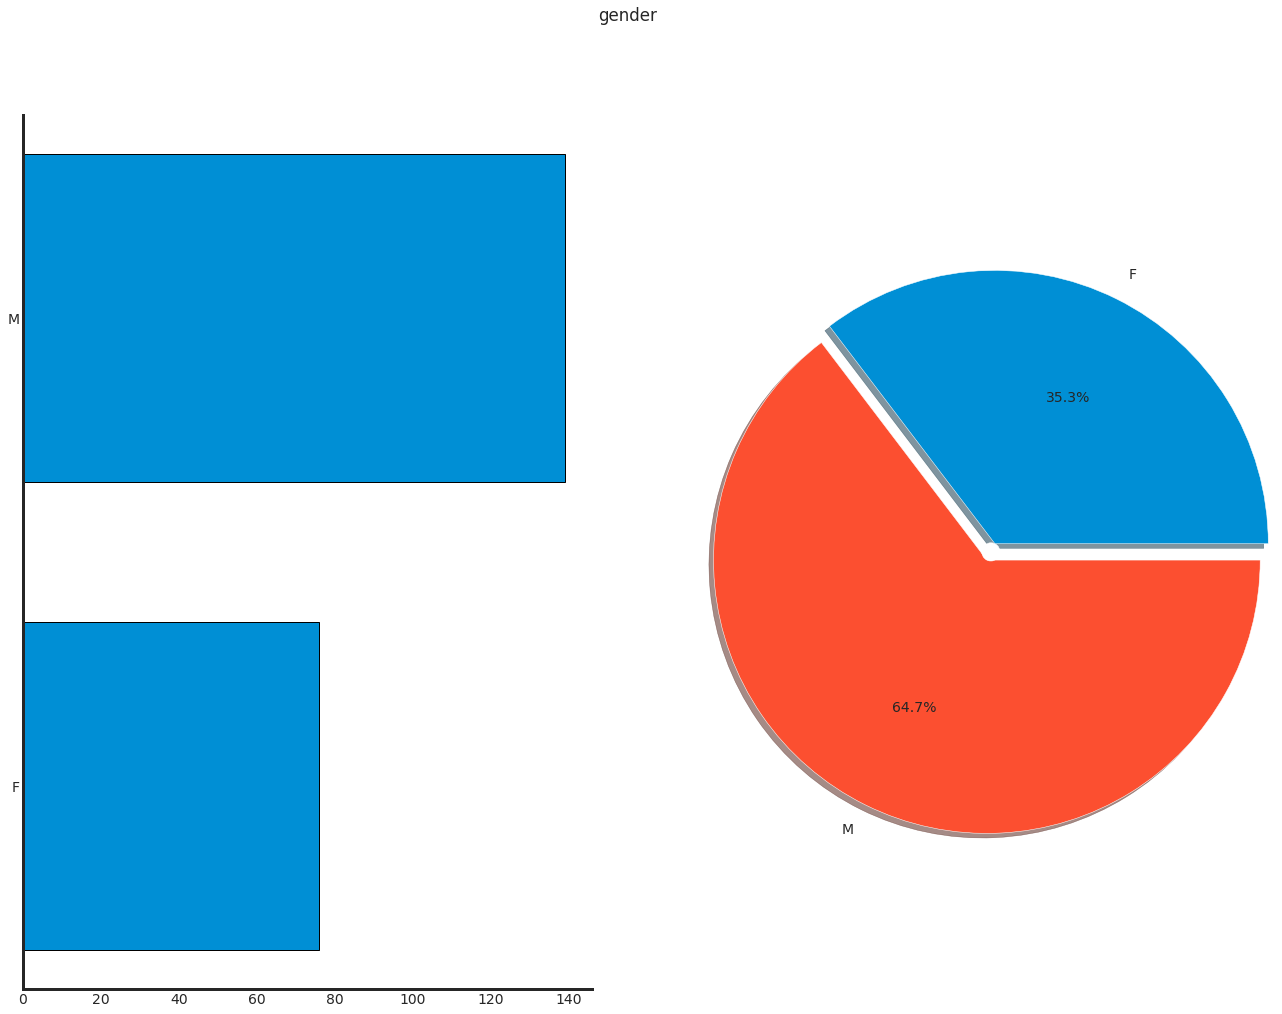

In [14]:
cat_unmariated_analysis('gender')

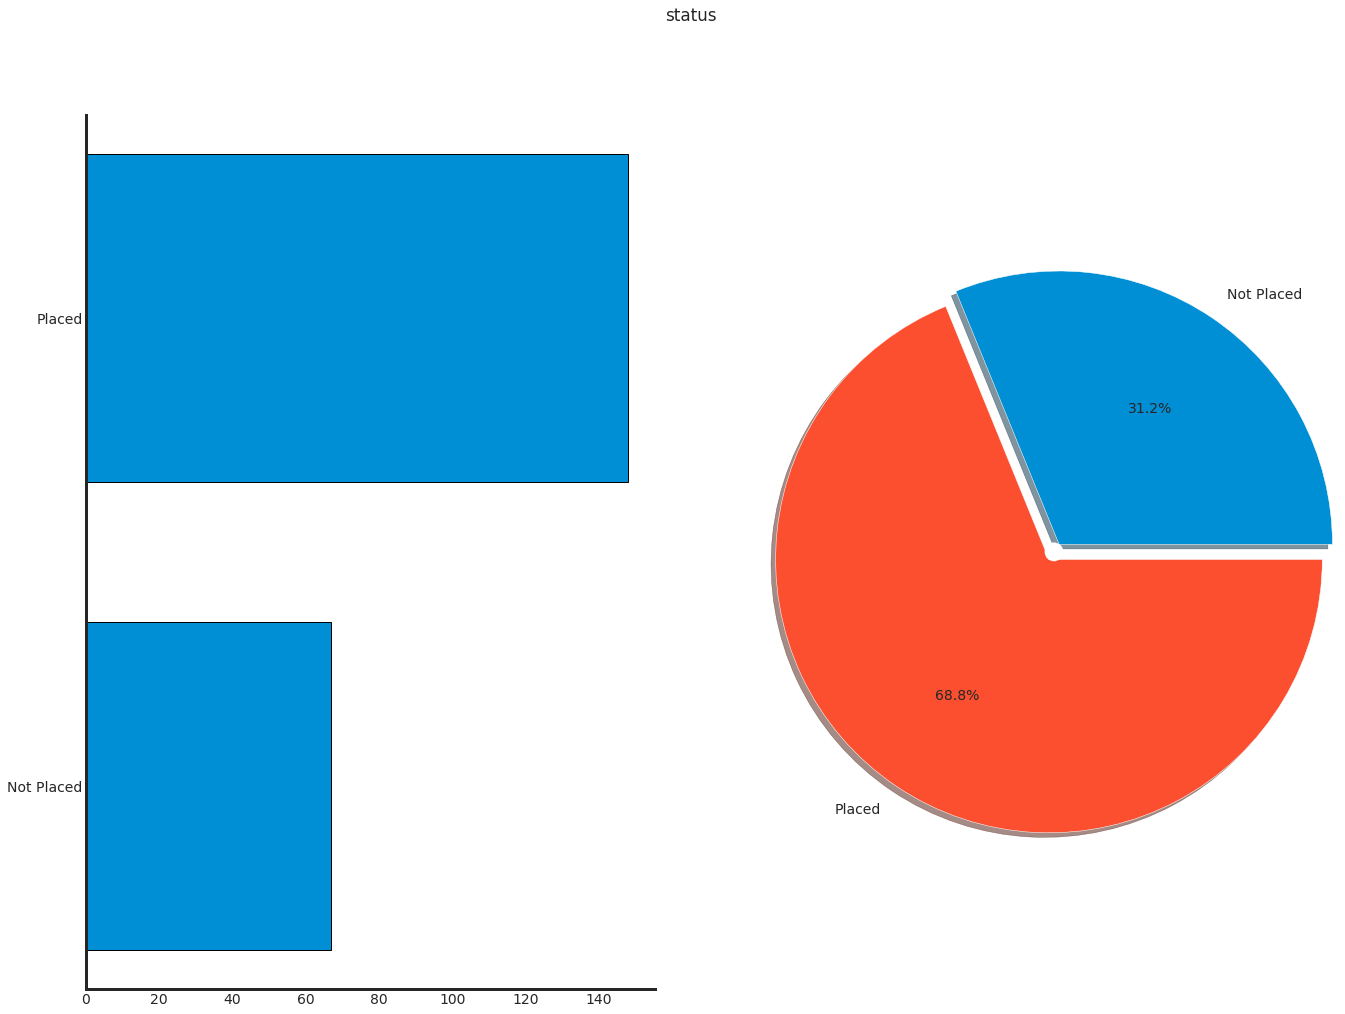

In [15]:
cat_unmariated_analysis('status')

In [25]:
for cols in data.select_dtypes(include = 'object').columns:
  print(cols)

gender
ssc_b
hsc_b
hsc_s
degree_t
workex
specialisation
status


In [29]:
attribute = ['gender','ssc_b','hsc_s','degree_t','workex','specialisation','status']

In [30]:
from pandas.plotting import scatter_matrix

In [37]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [40]:
placed = data[data['status'] == 'Placed']
not_placed = data[data['status']=='Not Placed']

In [42]:
placed_sample = placed.sample(n = 67)

In [45]:
new_dataset = pd.concat([placed_sample,not_placed],axis = 0)

In [47]:
new_dataset.shape

(134, 15)

In [48]:
new_dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
132,133,M,67.00,Others,68.00,Others,Commerce,64.00,Comm&Mgmt,Yes,74.4,Mkt&HR,53.49,Placed,300000.0
126,127,F,79.00,Others,61.00,Others,Science,75.50,Sci&Tech,Yes,70.0,Mkt&Fin,68.20,Placed,210000.0
147,148,M,70.00,Central,74.00,Central,Commerce,65.00,Comm&Mgmt,No,83.0,Mkt&Fin,62.28,Placed,300000.0
174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
20,21,M,62.00,Others,65.00,Others,Commerce,66.00,Comm&Mgmt,No,50.0,Mkt&HR,56.70,Placed,265000.0


In [51]:
new_dataset.reset_index().inplace = True

In [61]:
new_dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
132,133,1,67.00,1,68.00,1,1,64.00,0,1,74.4,1,53.49,1,300000.0
126,127,0,79.00,1,61.00,1,2,75.50,2,1,70.0,0,68.20,1,210000.0
147,148,1,70.00,0,74.00,0,1,65.00,0,0,83.0,0,62.28,1,300000.0
174,175,1,73.24,1,50.83,1,2,64.27,2,1,64.0,0,66.23,1,500000.0
20,21,1,62.00,1,65.00,1,1,66.00,0,0,50.0,1,56.70,1,265000.0


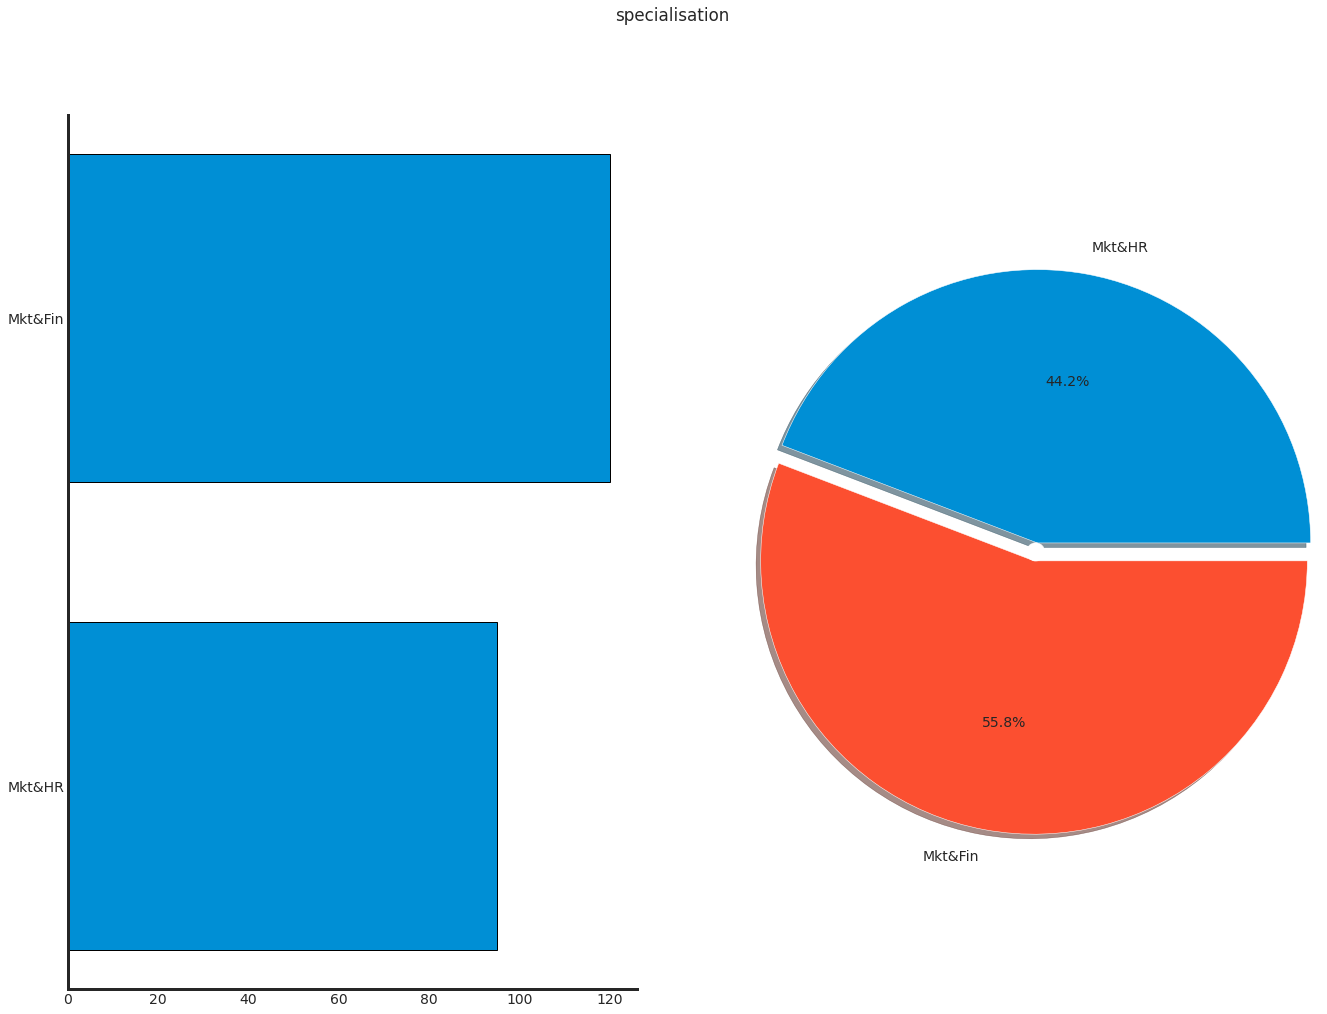

In [55]:
cat_unmariated_analysis('specialisation')

In [56]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()
for cols in new_dataset.select_dtypes(include = 'object').columns:
  print(cols)
  new_dataset[cols] = encoder.fit_transform(new_dataset[cols])

gender
ssc_b
hsc_b
hsc_s
degree_t
workex
specialisation
status


In [62]:
new_dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
132,133,1,67.00,1,68.00,1,1,64.00,0,1,74.4,1,53.49,1,300000.0
126,127,0,79.00,1,61.00,1,2,75.50,2,1,70.0,0,68.20,1,210000.0
147,148,1,70.00,0,74.00,0,1,65.00,0,0,83.0,0,62.28,1,300000.0
174,175,1,73.24,1,50.83,1,2,64.27,2,1,64.0,0,66.23,1,500000.0
20,21,1,62.00,1,65.00,1,1,66.00,0,0,50.0,1,56.70,1,265000.0


In [66]:
def all_info(data):
  for i in data.select_dtypes(exclude = 'object').columns:
    print('---------------------------------------------------------------------------------------------------')
    print(i)
    print(data.groupby(by = 'status')[i].describe())

In [68]:
all_info(new_dataset)

---------------------------------------------------------------------------------------------------
sl_no
        count        mean        std  min   25%    50%    75%    max
status                                                              
0        67.0  110.477612  65.859667  4.0  48.5  107.0  170.5  215.0
1        67.0   95.238806  54.069005  3.0  48.5   90.0  140.0  206.0
---------------------------------------------------------------------------------------------------
gender
        count      mean       std  min  25%  50%  75%  max
status                                                    
0        67.0  0.582090  0.496938  0.0  0.0  1.0  1.0  1.0
1        67.0  0.656716  0.478389  0.0  0.0  1.0  1.0  1.0
---------------------------------------------------------------------------------------------------
ssc_p
        count       mean       std    min   25%    50%   75%   max
status                                                            
0        67.0  57.544030  8.394246 

In [69]:
new_dataset.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

In [70]:
new_dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
132,133,1,67.00,1,68.00,1,1,64.00,0,1,74.4,1,53.49,1,300000.0
126,127,0,79.00,1,61.00,1,2,75.50,2,1,70.0,0,68.20,1,210000.0
147,148,1,70.00,0,74.00,0,1,65.00,0,0,83.0,0,62.28,1,300000.0
174,175,1,73.24,1,50.83,1,2,64.27,2,1,64.0,0,66.23,1,500000.0
20,21,1,62.00,1,65.00,1,1,66.00,0,0,50.0,1,56.70,1,265000.0


In [77]:
X = new_dataset.drop(columns = ['sl_no','status'],axis = 1)

In [75]:
Y = new_dataset['status']

In [78]:
print(X)
print(Y)

     gender  ssc_p  ssc_b  hsc_p  ...  etest_p  specialisation  mba_p    salary
132       1  67.00      1  68.00  ...    74.40               1  53.49  300000.0
126       0  79.00      1  61.00  ...    70.00               0  68.20  210000.0
147       1  70.00      0  74.00  ...    83.00               0  62.28  300000.0
174       1  73.24      1  50.83  ...    64.00               0  66.23  500000.0
20        1  62.00      1  65.00  ...    50.00               1  56.70  265000.0
..      ...    ...    ...    ...  ...      ...             ...    ...       ...
198       0  67.00      0  70.00  ...    88.00               1  71.96       0.0
201       1  54.20      0  63.00  ...    79.00               1  58.44       0.0
206       1  41.00      0  42.00  ...    97.00               0  53.39       0.0
208       0  43.00      0  60.00  ...    92.66               1  62.92       0.0
214       1  62.00      0  58.00  ...    89.00               1  60.22       0.0

[134 rows x 13 columns]
132    1
126   

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 1)

In [80]:
print(X.shape,X_train.shape,X_test.shape)

(134, 13) (120, 13) (14, 13)


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train,Y_train)

LogisticRegression()

In [84]:
train_predict = model.predict(X_train)

In [85]:
test_predict = model.predict(X_test)

In [87]:
accuracy_score(Y_train,train_predict)

1.0

In [88]:
accuracy_score(Y_test,test_predict)

1.0

In [92]:
input_data = [1,67.00,1,68.00,1,1,64.00,0,1,74.4,53.49,1,300000.0]
in_array = np.array(input_data)
reshape_data = in_array.reshape(1,-1)
prediction  = model.predict(reshape_data)
if prediction == 1:
  print('students are placed')
else:
  print('student are not placed')

students are placed


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
